In [65]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
from __future__ import print_function

import keras
from keras import metrics
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop, SGD
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from keras.models import model_from_json
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

In [222]:
predicted_data_02.shape

(243, 243)

In [268]:
fracture_data_1 = loadmat('fracture_sample.mat')['frac1']
fracture_data_2 = loadmat('fracture_sample.mat')['frac2']
fracture_data_01 = loadmat('fracture_sample.mat')['nonfrac1']
fracture_data_02 = loadmat('fracture_sample.mat')['nonfrac2']

In [269]:
#predicted_data = np.array(fracture_data > 0, dtype = int)
predicted_data_1 = loadmat('fracture_sample.mat')['frac1_binary']
predicted_data_2 = loadmat('fracture_sample.mat')['frac2_binary']
predicted_data_01 = np.zeros(fracture_data_01.shape)
predicted_data_02 = np.zeros(fracture_data_02.shape)

In [270]:
# 3D Convolutional
fracture_data_1 = np.pad(fracture_data_1, ((1, 1), (1, 1)), 'constant', 
                constant_values=((0, 0), (0, 0)))
predicted_data_1 = np.pad(predicted_data_1, ((1, 1), (1, 1)), 'constant', 
                constant_values=((0, 0), (0, 0)))
fracture_data_2 = np.pad(fracture_data_2, ((1, 1), (1, 1)), 'constant', 
                constant_values=((0, 0), (0, 0)))
predicted_data_2 = np.pad(predicted_data_2, ((1, 1), (1, 1)), 'constant', 
                constant_values=((0, 0), (0, 0)))
fracture_data_01 = np.pad(fracture_data_01, ((1, 1), (1, 1)), 'constant', 
                constant_values=((0, 0), (0, 0)))
predicted_data_01 = np.pad(predicted_data_01, ((1, 1), (1, 1)), 'constant', 
                constant_values=((0, 0), (0, 0)))
fracture_data_02 = np.pad(fracture_data_02, ((1, 1), (1, 1)), 'constant', 
                constant_values=((0, 0), (0, 0)))
predicted_data_02 = np.pad(predicted_data_02, ((1, 1), (1, 1)), 'constant', 
                constant_values=((0, 0), (0, 0)))

In [271]:
fracture_data_1 = np.array([fracture_data_1[(y-1):(y+2), (x-1):(x+2)] 
              for x in np.arange(1, fracture_data_1.shape[1] - 1) 
              for y in np.arange(1, fracture_data_1.shape[0] - 1)])

predicted_data_1 = np.array([predicted_data_1[y,x] 
              for x in np.arange(1, predicted_data_1.shape[1] - 1) 
              for y in np.arange(1, predicted_data_1.shape[0] - 1)])

fracture_data_2 = np.array([fracture_data_2[(y-1):(y+2), (x-1):(x+2)] 
              for x in np.arange(1, fracture_data_2.shape[1] - 1) 
              for y in np.arange(1, fracture_data_2.shape[0] - 1)])

predicted_data_2 = np.array([predicted_data_2[y,x] 
              for x in np.arange(1, predicted_data_2.shape[1] - 1) 
              for y in np.arange(1, predicted_data_2.shape[0] - 1)])

fracture_data_01 = np.array([fracture_data_01[(y-1):(y+2), (x-1):(x+2)] 
              for x in np.arange(1, fracture_data_01.shape[1] - 1) 
              for y in np.arange(1, fracture_data_01.shape[0] - 1)])

predicted_data_01 = np.array([predicted_data_01[y,x] 
              for x in np.arange(1, predicted_data_01.shape[1] - 1) 
              for y in np.arange(1, predicted_data_01.shape[0] - 1)])

fracture_data_02 = np.array([fracture_data_02[(y-1):(y+2), (x-1):(x+2)] 
              for x in np.arange(1, fracture_data_02.shape[1] - 1) 
              for y in np.arange(1, fracture_data_02.shape[0] - 1)])

predicted_data_02 = np.array([predicted_data_02[y,x] 
              for x in np.arange(1, predicted_data_02.shape[1] - 1) 
              for y in np.arange(1, predicted_data_02.shape[0] - 1)])

In [272]:
58084/241

241.0124481327801

In [273]:
train_split = int(fracture_data_1.shape[0]/2)
valid_split = int(fracture_data_1.shape[0]*3/4)

fracture_train = np.concatenate((fracture_data_1[:train_split,...],
                           fracture_data_2[:train_split,...],
                           fracture_data_01[:train_split,...],
                           fracture_data_02[:train_split,...]), axis = 0)
fracture_valid = np.concatenate((fracture_data_1[train_split:valid_split,...],
                           fracture_data_2[train_split:valid_split,...],
                           fracture_data_01[train_split:valid_split,...],
                           fracture_data_02[train_split:valid_split,...]), axis = 0)
fracture_test =  np.concatenate((fracture_data_1[valid_split:,...],
                           fracture_data_2[valid_split:,...],
                           fracture_data_01[valid_split:,...],
                           fracture_data_02[valid_split:,...]), axis = 0)

predicted_train = np.concatenate((predicted_data_1[:train_split,...],
                            predicted_data_2[:train_split,...],
                            predicted_data_01[:train_split,...],
                            predicted_data_02[:train_split,...]), axis = 0)
predicted_valid = np.concatenate((predicted_data_1[train_split:valid_split,...],
                            predicted_data_2[train_split:valid_split,...],
                            predicted_data_01[train_split:valid_split,...],
                            predicted_data_02[train_split:valid_split,...]), axis = 0)
predicted_test =  np.concatenate((predicted_data_1[valid_split:,...],
                            predicted_data_2[valid_split:,...],
                            predicted_data_01[valid_split:,...],
                            predicted_data_02[valid_split:,...]), axis = 0)

In [274]:
# Simple Neural Network

train_x = np.stack([fracture_train], axis = 3)
train_y = predicted_train

train_x_mean, train_x_std = np.mean(train_x), np.std(train_x)

train_x = (train_x - train_x_mean) / train_x_std

valid_x = np.stack([fracture_valid], axis = 3)
valid_y = predicted_valid

valid_x = (valid_x - train_x_mean) / train_x_std

test_x = np.stack([fracture_test], axis = 3)
test_y = predicted_test

test_x = (test_x - train_x_mean) / train_x_std

In [179]:
batch_size = 16
epochs = 20

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(train_y),
                                                 train_y)

model = Sequential()
    
#model.add(Conv2D(64, kernel_size = (3,3), data_format = 'channels_last',
#                     input_shape = train_x.shape[1:], kernel_initializer = 'random_uniform'))
#model.add(Activation('relu'))

model.add(Flatten(input_shape = train_x.shape[1:]))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=SGD(),
              metrics=['acc'])

callback = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=1,
                              verbose=0, mode='auto')]

history = model.fit(train_x, train_y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(valid_x, valid_y))#,
                    #callbacks = callback)#,
                    #class_weight=class_weights)

score = model.evaluate(test_x, test_y, verbose=0)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 9)                 0         
_________________________________________________________________
dense_34 (Dense)             (None, 32)                320       
_________________________________________________________________
dense_35 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_36 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_37 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_38 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 3         
Total para

In [180]:
test_y_predict = model.predict(test_x)


In [181]:
#test_y_predict = [x[0] for x in test_y_predict]
test_y_predict = np.array(test_y_predict)

In [182]:
test_y[:10]

array([0., 0., 1., 1., 1., 1., 1., 0., 0., 0.])

In [183]:
test_y_predict[:10]

array([[0.4184204 ],
       [0.52881974],
       [0.61232233],
       [0.71274996],
       [0.8529624 ],
       [0.7998978 ],
       [0.6232609 ],
       [0.36000293],
       [0.27011368],
       [0.11161608]], dtype=float32)

In [250]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, log_loss, f1_score
test_x.shape

(58084, 3, 3, 1)

In [184]:
confusion_matrix(test_y, (test_y_predict > 0.5))

array([[51663,   926],
       [ 3358,  2137]])

In [186]:
f1_score(test_y, (test_y_predict > 0.5))

0.4994157513437719

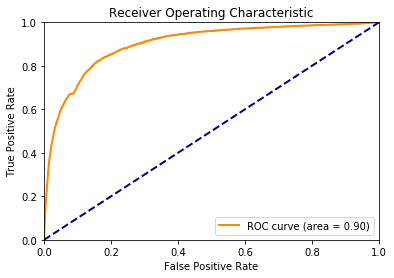

0.9011390405010538


In [190]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score, accuracy_score
fpr, tpr, thresholds = roc_curve(test_y, test_y_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw=lw, linestyle = '--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()
print(roc_auc)

In [283]:
test_y_2d = test_y[3:].reshape(241, 241)
test_y_predict_2d = test_y_predict[3:].reshape(241,241)
y_predict_2d = y_predict[3:].reshape(241,241)
#test_x_2d = test_x[3:,1,1,0].reshape(241,241)

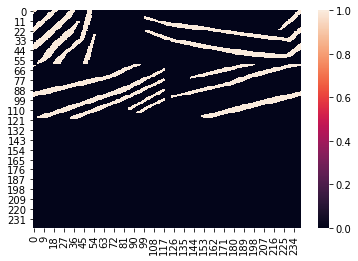

In [280]:
import seaborn as sns
sns.heatmap(test_y_2d)

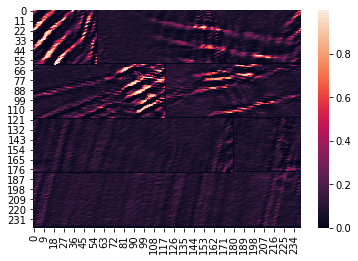

In [285]:
sns.heatmap(y_predict_2d)

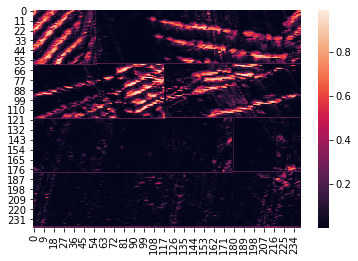

In [286]:
sns.heatmap(test_y_predict_2d)

In [275]:
train_x_flat = train_x.reshape(train_x.shape[0], 9)
valid_x_flat = valid_x.reshape(valid_x.shape[0], 9)
test_x_flat = test_x.reshape(test_x.shape[0], 9)

In [154]:
from sklearn.linear_model import LogisticRegression

In [276]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
optimal_c = 0.001
loss = 1000

for sub_c in C:
    model = LogisticRegression(C = sub_c).fit(train_x_flat, train_y)
    y_predict = model.predict_proba(valid_x_flat)
    sub_loss = log_loss(valid_y, y_predict)
    if sub_loss < loss:
        loss = sub_loss
        optimal_c = sub_c

model_final = LogisticRegression(C = optimal_c).fit(np.concatenate((train_x_flat, valid_x_flat), axis = 0),
                                                    np.concatenate((train_y, valid_y), axis = 0))
y_predict = model_final.predict_proba(test_x_flat)[:,1]

In [277]:
optimal_c, loss

(1000, 0.31957894681666904)

In [278]:
confusion_matrix(test_y, (y_predict > 0.5))

array([[52308,   281],
       [ 4410,  1085]])

In [261]:
f1_score(test_y, (y_predict > 0.5))

/Users/harold.li/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0